In [1]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
locationList = ['ufop.br']#,'usp.br,unicamp.br','unesp.br','ufsc.br','pucrs.br','df.ufscar.br','ufop.br','aluno.unb.br','dac.unicamp.br','ifsc.edu.br']

df_ok = pd.read_csv('radiusLoginOk.csv')
df_in = pd.read_csv('radiusLoginIncorrect.csv')

t = 5
p = 5
q = 4

In [3]:
for i in locationList:
    df1 = df_ok[df_ok['Domain'] == i]
    df2 = df_in[df_in['Domain'] == i]
    
    df1['Date'] = pd.to_datetime(df1['Date'])
    df1.set_index(['Date'])
    
    df2['Date'] = pd.to_datetime(df2['Date'])
    df2.set_index(['Date'])
    
    df1 = df1.groupby([pd.Grouper(key='Date',freq='{}Min'.format(t))]).agg({'ID':'count'})
    df1 = df1.rename(columns={'ID' : 'count'})
    
    df2 = df2.groupby([pd.Grouper(key='Date',freq='{}Min'.format(t))]).agg({'ID':'count'})
    df2 = df2.rename(columns={'ID' : 'count'})

C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\Lucas\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
def getClass(df1,df2):
    if df1 >= df2:
        return 0
    else:
        return 1

In [5]:
print(len(df1))
print(len(df2))

12431
206146


In [6]:
df2 = df2[193715:]
df1 = df1.reset_index().values
df2 = df2.reset_index().values

newdf = []
for i in range(0,len(df1)):
    line = []
    for j in range(0,len(df1[i])):
        if j == 0:
            line.append(df1[i,j])
        elif j == 1:
            line.append(getClass(df1[i,j],df2[i,j]))
    newdf.append(line)
    
df = pd.DataFrame(newdf,columns=['Date','Count'])

In [7]:
print(len(df[df['Count'] == 1]))
print(len(df[df['Count'] == 0]))

1414
11017


In [8]:
for i in range( 1, q + 1):
    df['Count-{}'.format(i)] = df['Count'].shift(i * 7 * 24 * 60 // t)

In [ ]:
print(df)

In [9]:
df = df.fillna(0)

In [ ]:
print(df)

In [10]:
df = df[q * (5 * 13 * 60 // t + 5):]
dfaux = df
dfaux = dfaux.set_index(['Date'])
dfaux = dfaux[dfaux.index.weekday < 5]
dfaux = dfaux.between_time('8:00','20:00')
print(len(dfaux[dfaux['Count'] == 1]))
print(len(dfaux[dfaux['Count'] == 0]))

763
2672


In [ ]:
print(df)

In [11]:
X1 = list()
Y1 = list()

for i in range(len(dfaux) - p - 1):
    X = list()
    for j in range(1, q + 1):
        X.append(dfaux['Count-{}'.format(j)][i + p + 1])
    X1.append(X + list(dfaux['Count'][i:(i + p)]))
    Y1.append(dfaux['Count'][i + p + 1])

In [12]:
x_train, x_test, y_train, y_test = train_test_split(X1,Y1, test_size= 0.4, random_state=27)

In [13]:
clf = MLPClassifier(hidden_layer_sizes=(60), max_iter=500, alpha=0.0001,
                     solver='adam', verbose=10,  random_state=21,tol=0.000000001)

In [14]:
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Iteration 1, loss = 0.64154743
Iteration 2, loss = 0.60447337
Iteration 3, loss = 0.57266133
Iteration 4, loss = 0.54597932
Iteration 5, loss = 0.52243037
Iteration 6, loss = 0.50218873
Iteration 7, loss = 0.48440371
Iteration 8, loss = 0.46939621
Iteration 9, loss = 0.45700027
Iteration 10, loss = 0.44534710
Iteration 11, loss = 0.43584785
Iteration 12, loss = 0.42781746
Iteration 13, loss = 0.42135971
Iteration 14, loss = 0.41549426
Iteration 15, loss = 0.41106944
Iteration 16, loss = 0.40734304
Iteration 17, loss = 0.40444434
Iteration 18, loss = 0.40205047
Iteration 19, loss = 0.39968944
Iteration 20, loss = 0.39822561
Iteration 21, loss = 0.39683130
Iteration 22, loss = 0.39568506
Iteration 23, loss = 0.39496792
Iteration 24, loss = 0.39381128
Iteration 25, loss = 0.39330362
Iteration 26, loss = 0.39260616
Iteration 27, loss = 0.39242643
Iteration 28, loss = 0.39182015
Iteration 29, loss = 0.39143283
Iteration 30, loss = 0.39092488
Iteration 31, loss = 0.39084073
Iteration 32, los

In [15]:
accuracy_score(y_test, y_pred)


0.8352769679300291

In [16]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1015,   74],
       [ 152,  131]], dtype=int64)

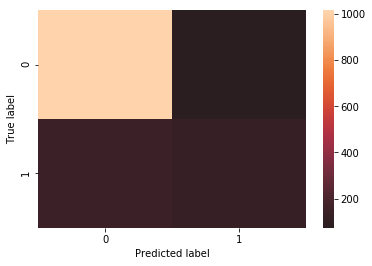

In [17]:
sns.heatmap(cm, center=True)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [18]:
c = 0
for i in y_pred:
    if i == 1:
        c += 1
        
print(c)



205
